# Predicting the Price of Used (Pre-owned) Cars
### _By: Ritu Pardasani, W1284193_
 
This data cotains details of over 370000 used cars scraped with Scrapy from Ebay @ Germany. The content of the data was in german, so I had to translate a few fields into English. Though it was a bit challenging, but I feel this is what it means that we never find clean excel files for our analysis. We always find data that needs a lot of work to be put into it before we can use it. Picked this data from Kaggel.com (https://www.kaggle.com/orgesleka/used-cars-database)

## About the Data:

The dataset consists of a single comma seperated file (autos.csv) that contains information about used car ads posted on Ebay website in Germany. 
<br>
<br>
autos.csv - File contains information about used cars, their price, model, brand, kms covered, year of registration etc. In simple words it contains all the details regarding a used car.

There are 21 columns in the dataset and their description is as follows:
<br>
<br>
<li> **dateCrawled :** When this ad was first crawled, all field-values are taken from this date</li>
<li>**name :** "Name" of the car</li>

<li>**seller :** Private or commercial dealer</li>

<li>**offerType:** This field just has one entry "offer" in it, thus its not really of an use</li>

<li>**price :** The price on the ad to sell the car</li>

<li>**abtest:** I couldn't understand what this field is about and how is it related to the data</li>

<li>**vehicleType:** Whether the vehicle is a coupe, a limosine, a small car, a SUV etc. </li>

<li>**yearOfRegistration:** In which year the car was first registered</li>

<li>**gearbox:** This gives information whether the car is Manual or Automatic</li>

<li>**powerPS:** Power of the car in PS</li>

<li>**model:** Model of the vehicle</li>

<li>**kilometer:** How many kilometers the car has driven</li>

<li>**monthOfRegistration:** In which month the car was first registered</li>

<li>**fuelType:** It has 6 categories lpg, cng, hybrid, petrol, diesel & electric</li>

<li>**brand:** The brand of the vehicle like Audi, Mercedes Benz etc.</li>

<li>**notRepairedDamage:** If the car has a damage which has not been repaired yet</li>

<li>**dateCreated:** The date for which the ad at ebay was created</li>

<li>**nrOfPictures:** Number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless)</li>

<li>**postalCode:** Postal code of the area where the car is located (so basically , location)</li>

<li>**lastSeenOnline:** When the crawler saw this ad last online</li>

_Note: I have ignored the fields that are not making any sense or have just one value for all the rows._

## Preparing Data for Data Analytics
This part includes cleaning and transforming the data into a form which I feel fit to apply the alogorithm.

<u><b>STEP 1: Importing all required libraries </b></u>


In [1]:
import pandas as pd #to work with dataframes
#Following 3 imports to make graphs/plots
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import math
## following two imports are for using the alogorithms 
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer


%matplotlib inline

<u><b>STEP 2: Reading the data </b></u>


In [2]:
#reading the csv to a dataframe and preventing unicode - decode error 
df = pd.read_csv('autos.csv', sep=',', header=0, low_memory=False , encoding='latin-1') 
df.head() #to see how does the data look like

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/24/16 11:52,Golf_3_1.6,Private,Offer,480.0,test,NaN,1993.0,Manual,0.0,golf,150000.0,0.0,petrol,volkswagen,NaN,3/24/16 0:00,0.0,70435.0,4/7/16 3:16
1,3/24/16 10:58,A5_Sportback_2.7_Tdi,Private,Offer,18300.0,test,coupe,2011.0,Manual,190.0,NaN,125000.0,5.0,diesel,audi,Yes,3/24/16 0:00,0.0,66954.0,4/7/16 1:46
2,3/14/16 12:52,"Jeep_Grand_Cherokee_""Overland""",Private,Offer,9800.0,test,suv,2004.0,Automatic,163.0,grand,125000.0,8.0,diesel,jeep,NaN,3/14/16 0:00,0.0,90480.0,4/5/16 12:47
3,3/17/16 16:54,GOLF_4_1_4__3TRER,Private,Offer,1500.0,test,Small car,2001.0,Manual,75.0,golf,150000.0,6.0,petrol,volkswagen,No,3/17/16 0:00,0.0,91074.0,3/17/16 17:40
4,3/31/16 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,Private,Offer,3600.0,test,Small car,2008.0,Manual,69.0,fabia,90000.0,7.0,diesel,skoda,No,3/31/16 0:00,0.0,60437.0,4/6/16 10:17


<u><b>STEP 3: Seeing the numeric fields information to gain insights </b></u>


In [3]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715370e+05,371537.000000,371537.000000,371537.000000,371537.000000,371537.0,371537.000000
mean,1.729549e+04,2004.577883,115.549151,125618.161852,5.734473,0.0,50820.666402
std,3.587910e+06,92.865496,192.137403,40112.919387,3.712383,0.0,25799.080292
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [4]:
df.dropna(how= 'all', inplace= True) #dropping null values

<u><b>STEP 4: Dropping columns which are not making any sense or have single value for all the rows </b></u>



In [5]:
print(df.seller.unique())
print(df.offerType.unique())
print(df.abtest.unique())
print(df.nrOfPictures.unique())

['Private' 'Commercial' nan]
['Offer' 'petition' nan]
['test' 'control' nan]
[  0.  nan]


In [6]:
df.drop(['seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns', inplace=True)

<u><b>STEP 5: Dropping duplicates </b></u>


In [7]:
df_clean = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])

<u><b>STEP 6: Finding outliers and filtering them, as outliers pose problems in the analysis </b></u>


In [8]:
print(df_clean.loc[df_clean.yearOfRegistration >= 2017].count()['name']) # Very new vehicles
print(df_clean.loc[df_clean.yearOfRegistration < 1950].count()['name']) # Very Old vehicles

14483
284


In [9]:
print(df_clean.loc[df_clean.price < 100].count()['name']) # Very cheap vehicles
print(df_clean.loc[df_clean.price > 150000].count()['name']) # Very expensive vehicles

12931
233


In [10]:
print(df_clean.loc[df_clean.kilometer < 5000].count()['name']) # Very few km
print(df_clean.loc[df_clean.kilometer > 200000].count()['name']) # Very large km

0
0


In [11]:
print(df_clean.loc[df_clean.powerPS < 10].count()['name']) # Too less Power
print(df_clean.loc[df_clean.powerPS > 500].count()['name']) #Too much Power

39579
829


In [12]:
##removing the outliers shown above
df_clean = df_clean[
        (df_clean.yearOfRegistration <= 2016) 
      & (df_clean.yearOfRegistration >= 1950) 
      & (df_clean.price >= 100) 
      & (df_clean.price <= 150000) 
      & (df_clean.powerPS >= 10) 
      & (df_clean.powerPS <= 500)]

In [13]:
df_clean.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,A5_Sportback_2.7_Tdi,18300.0,coupe,2011.0,Manual,190.0,NaN,125000.0,5.0,diesel,audi,Yes
2,"Jeep_Grand_Cherokee_""Overland""",9800.0,suv,2004.0,Automatic,163.0,grand,125000.0,8.0,diesel,jeep,NaN
3,GOLF_4_1_4__3TRER,1500.0,Small car,2001.0,Manual,75.0,golf,150000.0,6.0,petrol,volkswagen,No
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600.0,Small car,2008.0,Manual,69.0,fabia,90000.0,7.0,diesel,skoda,No
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650.0,limousine,1995.0,Manual,102.0,3er,150000.0,10.0,petrol,bmw,Yes


In [14]:
#checking the non-numeric fields and their values

print("Type of Fuel: " , df_clean['fuelType'].unique())
print("Damages: " , df_clean['notRepairedDamage'].unique())
print("Type of Vehicle: " , df_clean['vehicleType'].unique())
print("Brand of Vehicle: " , df_clean['brand'].unique())

Type of Fuel:  ['diesel' 'petrol' nan 'lpg' 'Others' 'hybrid' 'cng' 'Electric']
Damages:  ['Yes' nan 'No']
Type of Vehicle:  ['coupe' 'suv' 'Small car' 'limousine' 'cabrio' 'bus' 'Station Wagon' nan
 'Other']
Brand of Vehicle:  ['audi' 'jeep' 'volkswagen' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda' 'nissan'
 'renault' 'mercedes_benz' 'seat' 'honda' 'fiat' 'opel' 'mini' 'smart'
 'hyundai' 'alfa_romeo' 'subaru' 'volvo' 'mitsubishi' 'kia' 'suzuki'
 'lancia' 'porsche' 'citroen' 'toyota' 'chevrolet' 'dacia' 'daihatsu'
 'chrysler' 'sonstige_autos' 'Yesguar' 'daewoo' 'rover' 'saab' 'land_rover'
 'trabant' 'lada']


<u><b>STEP 7: Dealing with null/missing values </b></u>


In [15]:

df_clean.isnull().sum() #checking number of nulls/missing values in the data as per columns 

name                       0
price                      0
vehicleType            10818
yearOfRegistration         0
gearbox                 5260
powerPS                    0
model                  11345
kilometer                  0
monthOfRegistration        0
fuelType               15398
brand                      0
notRepairedDamage      42120
dtype: int64

In [16]:
## filling the null/missing fields with text - "no-value"
df_clean['notRepairedDamage'].fillna(value='no-value', inplace=True)
df_clean['fuelType'].fillna(value='no-value', inplace=True)
df_clean['gearbox'].fillna(value='no-value', inplace=True)
df_clean['vehicleType'].fillna(value='no-value', inplace=True)
df_clean['model'].fillna(value='no-value', inplace=True)

In [17]:
#Checking if all the nulls have been filled or dropped
df_clean.isnull().sum()

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [18]:
df_clean.head()


,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,A5_Sportback_2.7_Tdi,18300.0,coupe,2011.0,Manual,190.0,no-value,125000.0,5.0,diesel,audi,Yes
2,"Jeep_Grand_Cherokee_""Overland""",9800.0,suv,2004.0,Automatic,163.0,grand,125000.0,8.0,diesel,jeep,no-value
3,GOLF_4_1_4__3TRER,1500.0,Small car,2001.0,Manual,75.0,golf,150000.0,6.0,petrol,volkswagen,No
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600.0,Small car,2008.0,Manual,69.0,fabia,90000.0,7.0,diesel,skoda,No
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650.0,limousine,1995.0,Manual,102.0,3er,150000.0,10.0,petrol,bmw,Yes


<u><b>STEP 8: Feature Engineering: </b></u>
<br>
In this part I'll try to explore all the coloumns and finalize my features. 


model
golf        24845
Others      21736
3er         17704
no-value    11345
polo        10477
corsa        9821
astra        8844
a4           8816
passat       8658
c_klasse     7559
Name: model, dtype: int64


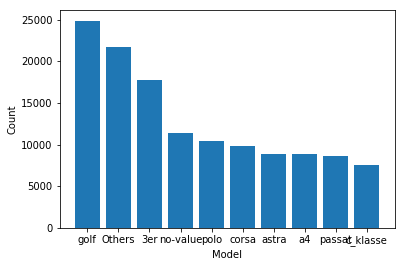

In [19]:
uniqueValues = df_clean['model'].unique()

##grouping by model and plotting it versus count of each model
groupedValues = df_clean.groupby(by='model')['model'].count().sort_values(ascending=False)
rangedValues = range(min(len(uniqueValues), 10))

print( groupedValues.head(10))
plt.figure(figsize=(6,4))
plt.bar(rangedValues, groupedValues.head(10)) 
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rangedValues, groupedValues.index)
plt.show()

brand
volkswagen       64851
bmw              34441
opel             31755
mercedes_benz    29564
audi             27984
ford             20492
renault          13630
peugeot           9192
fiat              7533
seat              5840
Name: brand, dtype: int64


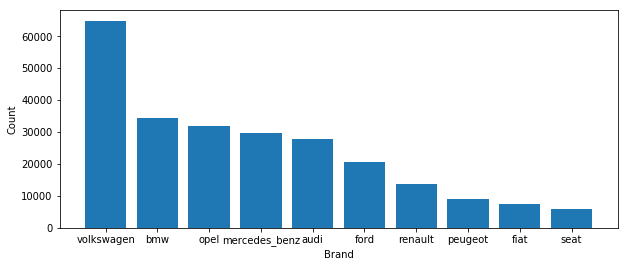

In [20]:
uniqueValues = df_clean['brand'].unique()

##grouping by brand and plotting it versus count of each vehicle per brand
groupedValues = df_clean.groupby(by='brand')['brand'].count().sort_values(ascending=False)
rangedValues = range(min(len(uniqueValues), 10))

print( groupedValues.head(10))
plt.figure(figsize=(10,4))
plt.bar(rangedValues, groupedValues.head(10)) 
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rangedValues, groupedValues.index)
plt.show()

vehicleType
limousine        84843
Small car        68418
Station Wagon    59859
bus              26987
cabrio           20921
coupe            16799
suv              13044
no-value         10818
Other             2446
Name: vehicleType, dtype: int64


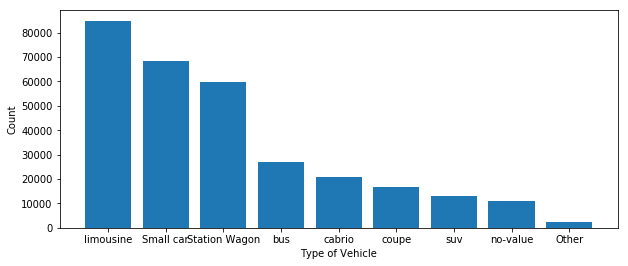

In [21]:
uniqueValues = df_clean['vehicleType'].unique()

##grouping by type of the vehicle and plotting it versus count of each vehicle type
groupedValues = df_clean.groupby(by='vehicleType')['vehicleType'].count().sort_values(ascending=False)
rangedValues = range(min(len(uniqueValues), 10))

print( groupedValues.head(10))
plt.figure(figsize=(10,4))
plt.bar(rangedValues, groupedValues.head(10)) 
plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.xticks(rangedValues, groupedValues.index)
plt.show()

fuelType
petrol      189920
diesel       93301
no-value     15398
lpg           4646
cng            474
hybrid         242
Others          85
Electric        69
Name: fuelType, dtype: int64


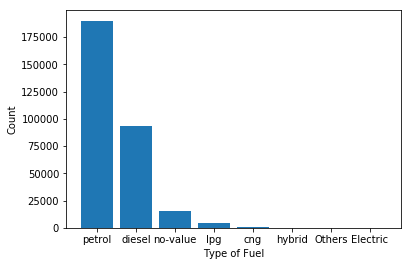

In [22]:
uniqueValues = df_clean['fuelType'].unique()

##grouping by type of fuel and plotting it versus count of each vehicle's fuel type

groupedValues = df_clean.groupby(by='fuelType')['fuelType'].count().sort_values(ascending=False)
rangedValues = range(min(len(uniqueValues), 10))

print( groupedValues.head(10))
plt.figure(figsize=(6,4))
plt.bar(rangedValues, groupedValues.head(10)) 
plt.xlabel('Type of Fuel')
plt.ylabel('Count')
plt.xticks(rangedValues, groupedValues.index)
plt.show()

notRepairedDamage
No          233688
no-value     42120
Yes          28327
Name: notRepairedDamage, dtype: int64


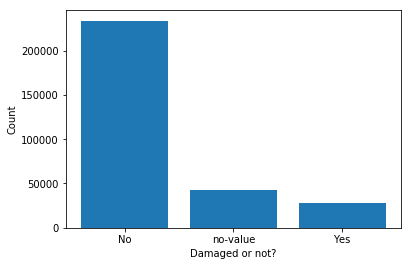

In [23]:
uniqueValues = df_clean['notRepairedDamage'].unique()


groupedValues = df_clean.groupby(by='notRepairedDamage')['notRepairedDamage'].count().sort_values(ascending=False)
rangedValues = range(min(len(uniqueValues), 10))

print( groupedValues.head(10))
plt.figure(figsize=(6,4))
plt.bar(rangedValues, groupedValues.head(10)) 
plt.xlabel('Damaged or not?')
plt.ylabel('Count')
plt.xticks(rangedValues, groupedValues.index)
plt.show()

gearbox
Manual       231996
Automatic     66879
no-value       5260
Name: gearbox, dtype: int64


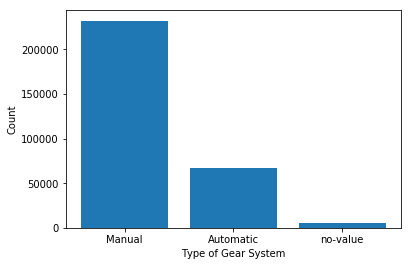

In [24]:
uniqueValues = df_clean['gearbox'].unique()

groupedValues = df_clean.groupby(by='gearbox')['gearbox'].count().sort_values(ascending=False)
rangedValues = range(min(len(uniqueValues), 10))

print( groupedValues.head(10))
plt.figure(figsize=(6,4))
plt.bar(rangedValues, groupedValues.head(10)) 
plt.xlabel('Type of Gear System')
plt.ylabel('Count')
plt.xticks(rangedValues, groupedValues.index)
plt.show()

<u><b>STEP 9: Understanding the importance of the field name: </b></u>
<br>
When I saw the field "name" - I wanted to see whether what impact will that field have on the price. So I decided to make a new coloumn in the dataframe called as "namelength" and filled it with the number of characters each name has. I made the restriction of maximum 60 characters. 

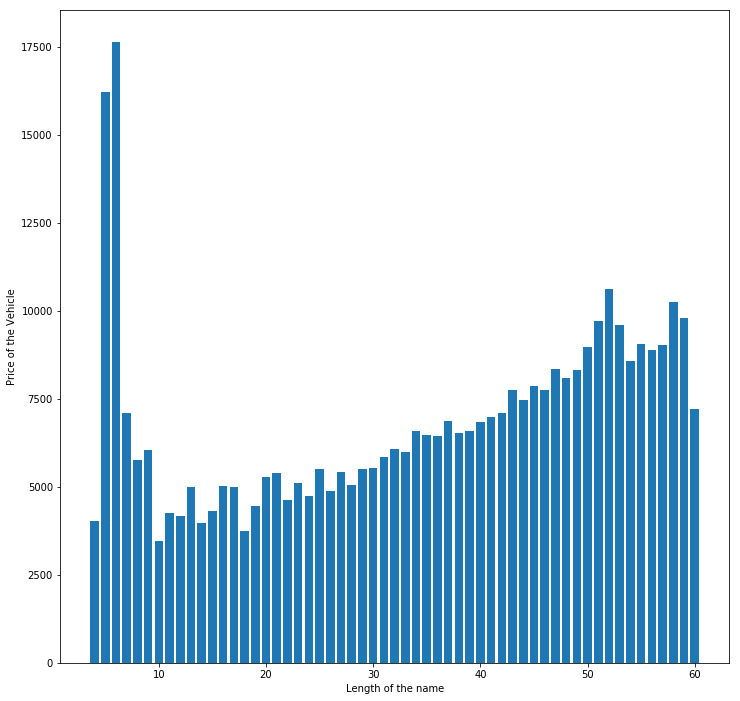

In [25]:
df_clean['namelength'] = [min(60, len(n)) for n in df_clean['name']] #creating new coloumn with the length of the name in which maximum 60 characters will be taken

groupedValues = df_clean.groupby(by='namelength')['price'].mean() #grouping the field by namelength and check mean price for that

plt.figure(figsize=(12,12))
plt.bar(groupedValues.index, groupedValues) 
plt.xlabel('Length of the name')
plt.ylabel('Price of the Vehicle')
plt.show()

**Insights from the graph:** The graph shown above shows that except for a few outliers the trend is that the price is increasing with the increase in the length of the name. Which means that if the name is longer it will have more details about the car(more features, more accessories etc.), and thus the price will also be more. 

Though its not true for some values which are less than 10 characters (namelength), hence these can be considered as exceptions and outliers. The graph clearly shows a pattern between namelength and price.

**Dropping the coloumn "Name" because I feel its not an importat feature** : Because as I have already used this field for the insight above, it is of no use in predicting the price. 

In [26]:
df_clean.drop(['name'], axis='columns', inplace=True)


<u><b>STEP 10: Converting the non-numeric fields into numeric fields and creating a new DataFrame which will be used for predicting the value </b></u>


These non-numeric fields - 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType' & 'vehicleType' need to be converted into numeric fields as ML algorithms cannot be applied to string fields.

In [27]:
#making a copy of the clean dataframe so that we get a new dataframe for 
#applying the algo and we'll also have the original dataframe for comparison

df_model  = df_clean.copy(deep=False)

In [28]:
df_clean.gearbox.unique()

array(['Manual', 'Automatic', 'no-value'], dtype=object)

In [29]:
df_model['gearbox'] = df_model.gearbox.replace({
        'Automatic': 0,
        'Manual': 1,
        'no-value': 2})

In [30]:
df_model.fuelType.unique()

array(['diesel', 'petrol', 'no-value', 'lpg', 'Others', 'hybrid', 'cng',
       'Electric'], dtype=object)

In [31]:
df_model['fuelType'] = df_model.fuelType.replace({
        'diesel': 0,
        'petrol': 1,
        'lpg': 2,
        'hybrid': 3,
        'Electric': 4,
        'cng': 5,
        'no-value': 6,
        'Others': 7})

In [32]:
df_model.vehicleType.unique()

array(['coupe', 'suv', 'Small car', 'limousine', 'cabrio', 'bus',
       'Station Wagon', 'no-value', 'Other'], dtype=object)

In [33]:
df_model['vehicleType'] = df_model.vehicleType.replace({
        'coupe': 0, 
        'suv':1, 
        'Small car': 2, 
        'limousine': 3, 
        'cabrio': 4, 
        'bus': 5,
        'Station Wagon': 6, 
        'no-value': 7, 
        'Other': 8})

In [34]:
df_model.notRepairedDamage.unique()

array(['Yes', 'no-value', 'No'], dtype=object)

In [35]:
df_model['notRepairedDamage'] = df_model.notRepairedDamage.replace({
        'Yes': 0, 
        'no-value': 1, 
        'No': 2 })

In [36]:
df_model.brand.unique()

array(['audi', 'jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'seat', 'honda',
       'fiat', 'opel', 'mini', 'smart', 'hyundai', 'alfa_romeo', 'subaru',
       'volvo', 'mitsubishi', 'kia', 'suzuki', 'lancia', 'porsche',
       'citroen', 'toyota', 'chevrolet', 'dacia', 'daihatsu', 'chrysler',
       'sonstige_autos', 'Yesguar', 'daewoo', 'rover', 'saab',
       'land_rover', 'trabant', 'lada'], dtype=object)

In [37]:
df_model.model.unique()

array(['no-value', 'grand', 'golf', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'arosa', 'Others', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'one', 'fortwo', '1er',
       'b_klasse', 'a8', 'jetta', 'fiesta', 'c_klasse', 'micra', 'vito',
       'sprinter', 'astra', '156', 'escort', 'forester', 'xc_reihe',
       'scenic', 'ka', 'a1', 'focus', 'a4', 'tt', 'a6', 'Yeszz', 'omega',
       'slk', '7er', 'combo', 'corsa', '80', '147', 'glk', 'z_reihe',
       'sorento', 'ibiza', 'mustang', 'eos', 'touran', 'getz', 'insignia',
       'almera', 'megane', 'a3', 'lupo', 'r19', 'caddy', 'mondeo',
       'cordoba', 'colt', 'impreza', 'vectra', 'berlingo', 'm_klasse',
       'tiguan', '6_reihe', 'c4', 'panda', 'up', 'i_reihe', 'ceed',
       'kangoo', '5_reihe', 'yeti', 'octavia', 'zafira', 'mii', 'rx_reihe',
       '6er', 'modus', 'fox', 'matiz', 'beetle', 'rio', 'touareg', 'logan',
  

As shown above, the **'brand'** and **'model'** field have lots of values and they are very important features for us to determine price. Hence I used the sklearn library's preprocessor Label encoder to give these fields numeric values.

In [38]:
nonNumericFields = ['model', 'brand']
temp = {}

## using for loop to change fields for both of the features simultaneously 
for field in nonNumericFields:
    temp[field] = preprocessing.LabelEncoder()
    temp[field].fit(df_model[field])
    transformedValue = temp[field].transform(df_model[field]) 
    df_model.loc[:, field] = pd.Series(transformedValue, index=df_model.index)

In [39]:
##new dataframe with all the values in numbers
df_model.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,namelength
1,18300.0,0,2011.0,1,190.0,163,125000.0,5.0,0,2,0,20
2,9800.0,1,2004.0,0,163.0,120,125000.0,8.0,0,14,1,30
3,1500.0,2,2001.0,1,75.0,119,150000.0,6.0,1,38,2,18
4,3600.0,2,2008.0,1,69.0,104,90000.0,7.0,0,31,2,30
5,650.0,3,1995.0,1,102.0,11,150000.0,10.0,1,3,0,50


In [40]:
##original dataframe
df_clean.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,namelength
1,18300.0,coupe,2011.0,Manual,190.0,no-value,125000.0,5.0,diesel,audi,Yes,20
2,9800.0,suv,2004.0,Automatic,163.0,grand,125000.0,8.0,diesel,jeep,no-value,30
3,1500.0,Small car,2001.0,Manual,75.0,golf,150000.0,6.0,petrol,volkswagen,No,18
4,3600.0,Small car,2008.0,Manual,69.0,fabia,90000.0,7.0,diesel,skoda,No,30
5,650.0,limousine,1995.0,Manual,102.0,3er,150000.0,10.0,petrol,bmw,Yes,50


**Final Dataframe -  "df_model"  which will be used for predicting price**

In [41]:
df_model.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,namelength
1,18300.0,0,2011.0,1,190.0,163,125000.0,5.0,0,2,0,20
2,9800.0,1,2004.0,0,163.0,120,125000.0,8.0,0,14,1,30
3,1500.0,2,2001.0,1,75.0,119,150000.0,6.0,1,38,2,18
4,3600.0,2,2008.0,1,69.0,104,90000.0,7.0,0,31,2,30
5,650.0,3,1995.0,1,102.0,11,150000.0,10.0,1,3,0,50


<u><b>STEP 11: Checking correlation among features: </b></u>
<br>
This will help us in finding the correlation between the features and how they are related to the price.

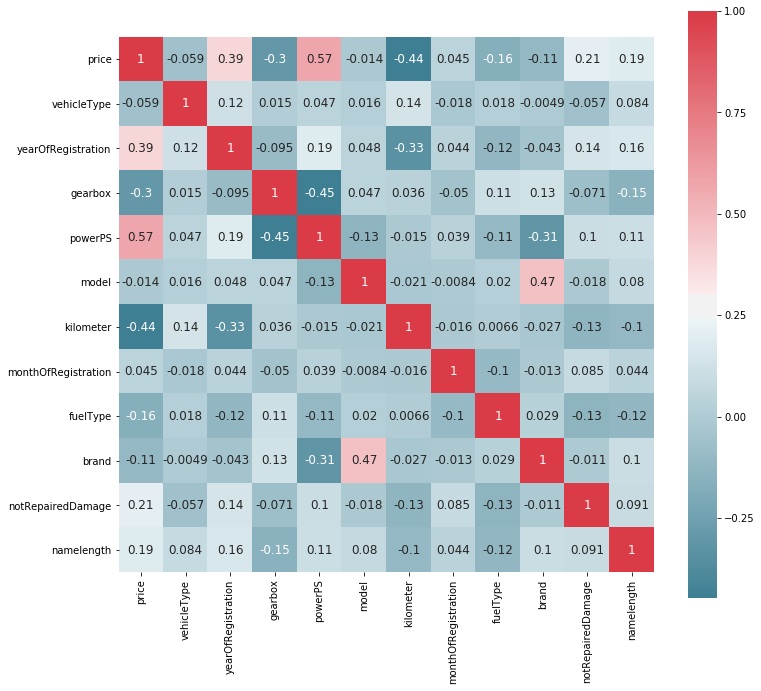

In [42]:
correlation = df_model.corr()
_ , ax = plt.subplots( figsize =( 12 , 12 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
heatmap = sns.heatmap(
    correlation, 
    cmap = cmap,
    square=True, 
    cbar_kws={ 'shrink' : .9 }, 
    ax=ax, 
    annot = True, 
    annot_kws = { 'fontsize' : 12 }
)

**This helps in determining the importance of the factors while attemting to predict the price.**
<br>
<br>
**Following is the most influencing features for predicting the price:**

In [43]:
df_model.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                0.573032
kilometer              0.444446
yearOfRegistration     0.385270
gearbox                0.297727
notRepairedDamage      0.213491
namelength             0.185848
fuelType               0.160075
brand                  0.107771
vehicleType            0.058739
monthOfRegistration    0.044783
model                  0.013941
Name: price, dtype: float64

<u><b>STEP 12: Prepare data for training and testing: </b></u>
<br>
Preparing train and test data and finetuning the price coloumn.

In [44]:
##converting the price values into natural log of those values - to make it easier for the calculation
Y = np.log1p(df_model['price'])
## X will have every other field except 'Price'
X = df_model.drop(['price'], axis='columns', inplace=False)


In [45]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split


# Percent of the X array to use as training set. This implies that the rest will be test set
test_size = .25

#Split into train and validation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(228101, 11) (76034, 11) (228101,) (76034,)


<u><b>STEP 13: Using the Random Forest Algorithm to predict the price</b></u>


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
clf = clf.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.1min finished


In [47]:
print('Train Accuracy Score:', clf.best_score_)
print('Best Parameters:' , clf.best_params_)

Train Accuracy Score: 0.829013288714
Best Parameters: {'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [48]:
bp = clf.best_params_
model = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
model.fit(X_train, y_train)

print('Test Accuracy Score:',  model.score(X_test, y_test))

Test Accuracy Score: 0.825748511155


<u><b>STEP 13: Predicting the price for test data and plotting it with actual price to see the pattern</b></u>

In [49]:
df_model.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,namelength
1,18300.0,0,2011.0,1,190.0,163,125000.0,5.0,0,2,0,20
2,9800.0,1,2004.0,0,163.0,120,125000.0,8.0,0,14,1,30
3,1500.0,2,2001.0,1,75.0,119,150000.0,6.0,1,38,2,18
4,3600.0,2,2008.0,1,69.0,104,90000.0,7.0,0,31,2,30
5,650.0,3,1995.0,1,102.0,11,150000.0,10.0,1,3,0,50


**Trying to predict the price of a car, by manually inputing values for each of the features (except price - as the 'model' doesn't include the feature 'Price') in the dataframe shown above.**

In [50]:
y_pred= model.predict([[1,2012,1,75,120,90000,5,3,2,1,15]])
print ("Price= $" , np.expm1(y_pred))

Price= $ [ 5655.49079842]


In [51]:
y_pred= model.predict(X_test)
print (y_pred)

[ 8.54711494  7.61683416  7.07925312 ...,  7.33335654  6.69514081
  9.94424941]


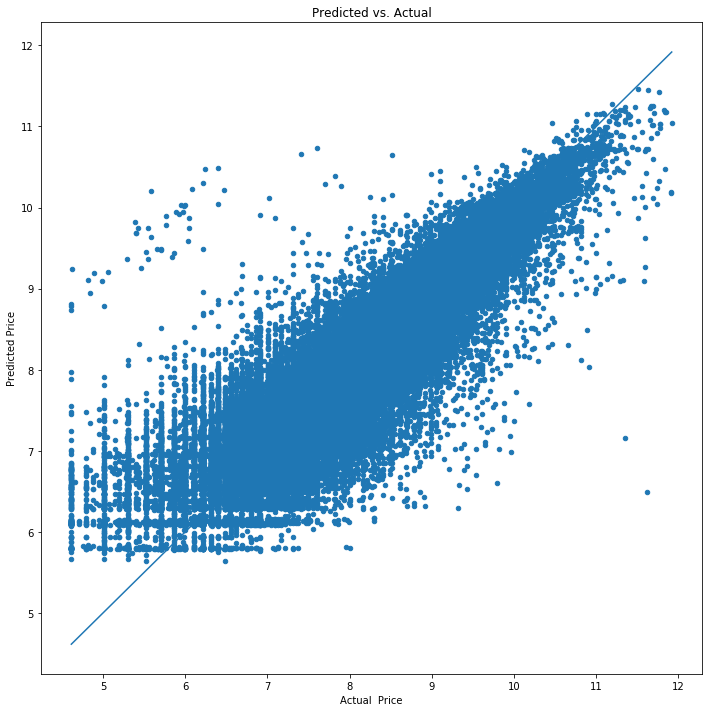

In [52]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual  Price')
plt.ylabel('Predicted Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

## Conclusion:
The above made chart shows that the predicted price value aligns with the actual price value to quite an extent. Hence, the model is good enough to predict the price of the used cars.